In [5]:
# Behavioural analysis

## Preparing the data

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob
from matplotlib import cm
import psychopy
from psychopy.tools.filetools import fromFile

Loading the data:

In [7]:
%matplotlib inline
plt.style.use('dark_background')
expName = 'mc2_tgT-mcBv'
#condName = 'mc2_tgT-mcBv_peri'
dataDir = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data/', expName + '*'))
print dataDir
allSubjDirs = glob.glob(dataDir + '/' + expName + '*')
print allSubjDirs
stairs = pd.DataFrame()
# matrices for intensities, responses, and means of reversals:
intns, resps, thisRevs, revMeans = [],[],[],[] 
orderInfo = pd.DataFrame() # subj, session, and stair info for ordering intns & resps

/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv*
['/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_mtn-c_p0_s1_2017-01-31_1052', '/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_mtn-p_p0_s1_2017-01-31_1225']


In [8]:
for subjDir in allSubjDirs:
    print subjDir
    subjStairsPath = glob.glob(subjDir + '/' + expName + '*.csv')[0]
    subjStairs = pd.read_csv(subjStairsPath)
    stairs = stairs.append(subjStairs)
    #print subjStairs
    for subjStairLabel in subjStairs['stairLabel']:
        #print subjStairLabel #thisSubjStair['label']
        thisStair = fromFile(subjDir + '/' + subjStairLabel + '.psydat')
        intns.append(thisStair.intensities)
        resps.append(thisStair.data)
        theseRevIntns = thisStair.reversalIntensities #detectRevs(thisStair)
        #print np.round(theseRevIntns,1)
        revMeans.append([np.average(thisStair.reversalIntensities[-4:]),
                         np.average(thisStair.reversalIntensities[-6:]),
                         np.average(thisStair.reversalIntensities[-8:])])
        orderInfo = orderInfo.append(pd.DataFrame({
                    'participant': subjStairs.participant[0],
                    'mcBv': thisStair.extraInfo['mcBv'],
                    'targTpeak': thisStair.extraInfo['targTpeak'],
                    'targXoff2': thisStair.extraInfo['targXoff2'],
                    'targV': thisStair.extraInfo['targV'],
                    'stairStart': [thisStair.extraInfo['startContr']]
                    }))
                    #'sessionLabel': os.path.basename(subjStairsPath)[:-20],
                    #'stairLabel': [subjStairLabel]
        #print np.round(thisStair.intensities,2)
        #print thisStair.data # responses (correct/incorrect)
        #print thisStair.extraInfo

/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_mtn-c_p0_s1_2017-01-31_1052
/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_mtn-p_p0_s1_2017-01-31_1225


In [9]:
stairs['condLabel'] = 'mcBv-' + stairs.mcBv.astype(str) + '_' + \
                      'tgT-' + stairs.targTpeak.astype(str) + '_' + \
                      'tgEcc-' + stairs.targXoff2.astype(str) + '_' + \
                      'tgV-' + stairs.targV.astype(str)
print stairs.shape
print stairs.columns
stairs.head(5)

(36, 29)
Index([u'expName', u'expPara', u'time', u'participant', u'dom', u'session',
       u'nRevs', u'mcSz', u'mcSf', u'mcBv', u'mcBsf', u'mcPeriGap',
       u'mcPeriFade', u'targSz', u'targSf', u'targOri1', u'targOri2',
       u'targXoff1', u'targXoff2', u'targYoff', u'targV', u'targTtot',
       u'targTpeak', u'trialT', u'fixCross', u'stairLabel', u'stairStart',
       u'meanRev6', u'condLabel'],
      dtype='object')


,expName,expPara,time,participant,dom,session,nRevs,mcSz,mcSf,mcBv,...,targYoff,targV,targTtot,targTpeak,trialT,fixCross,stairLabel,stairStart,meanRev6,condLabel
0,mc2_tgT-mcBv,mtn-c,2017-01-31_1052,0,0,1,10,256,0.1,9.60,...,0,3.5,1,0.5,2,1,st0_mcBv9.6_targTpeak0.5,0,-1.80,mcBv-9.6_tgT-0.5_tgEcc-48_tgV-3.5
1,mc2_tgT-mcBv,mtn-c,2017-01-31_1052,0,0,1,10,256,0.1,0.60,...,0,3.5,1,1.5,2,1,st-3_mcBv0.6_targTpeak1.5,-3,-1.65,mcBv-0.6_tgT-1.5_tgEcc-48_tgV-3.5
2,mc2_tgT-mcBv,mtn-c,2017-01-31_1052,0,0,1,10,256,0.1,0.01,...,0,3.5,1,0.5,2,1,st0_mcBv0.01_targTpeak0.5,0,-1.80,mcBv-0.01_tgT-0.5_tgEcc-48_tgV-3.5
3,mc2_tgT-mcBv,mtn-c,2017-01-31_1052,0,0,1,10,256,0.1,9.60,...,0,3.5,1,1.5,2,1,st-3_mcBv9.6_targTpeak1.5,-3,-1.65,mcBv-9.6_tgT-1.5_tgEcc-48_tgV-3.5
4,mc2_tgT-mcBv,mtn-c,2017-01-31_1052,0,0,1,10,256,0.1,9.60,...,0,3.5,1,0.5,2,1,st-3_mcBv9.6_targTpeak0.5,-3,-3.75,mcBv-9.6_tgT-0.5_tgEcc-48_tgV-3.5


In [10]:
print np.shape(resps)
print np.shape(intns)
print np.shape(revMeans)
orderInfo = orderInfo.reset_index(drop=True)
print orderInfo.shape
orderInfo.head(5)

(36,)
(36,)
(36, 3)
(36, 6)


,mcBv,participant,stairStart,targTpeak,targV,targXoff2
0,9.60,0,0,0.5,3.5,48
1,0.60,0,-3,1.5,3.5,48
2,0.01,0,0,0.5,3.5,48
3,9.60,0,-3,1.5,3.5,48
4,9.60,0,-3,0.5,3.5,48


Combining the trial data into a tall df.

In [11]:
nStairs = np.shape(resps)[0]
nTrials = []
for thisResp in resps: nTrials.append(np.shape(thisResp)[0])
nTrialsMax = np.max(nTrials)
allResps, allIntns = [], []
for i in range(nStairs):
    thisResp, thisIntn = resps[i], intns[i]
    x, y = np.empty((nTrialsMax,)), np.empty((nTrialsMax,))
    x[:], y[:] = np.NAN, np.NAN
    x[0:nTrials[i]] = np.array(thisResp)
    y[0:nTrials[i]] = np.array(thisIntn)
    allResps.append(x)
    allIntns.append(y)
orderInfoRepd = orderInfo.loc[np.repeat(orderInfo.index.values,nTrialsMax)]
print orderInfoRepd.shape
orderInfoRepd = orderInfoRepd.reset_index(drop=True)
orderInfoRepd['trialN'] = np.tile(np.linspace(1,nTrialsMax,nTrialsMax),nStairs)
orderInfoRepd['intns'] = np.array(allIntns).flatten()
orderInfoRepd['resps'] = np.array(allResps).flatten()
trials = pd.merge(orderInfoRepd, stairs, on=['participant','mcBv','targTpeak',
                                             'targXoff2', 'targV', 'stairStart'])
trials.head(5)

(1620, 6)


,mcBv,participant,stairStart,targTpeak,targV,targXoff2,trialN,intns,resps,expName,...,targOri1,targOri2,targXoff1,targYoff,targTtot,trialT,fixCross,stairLabel,meanRev6,condLabel
0,9.6,0,0,0.5,3.5,48,1.0,0.0,1.0,mc2_tgT-mcBv,...,0,0,-48,0,1,2,1,st0_mcBv9.6_targTpeak0.5,-1.8,mcBv-9.6_tgT-0.5_tgEcc-48_tgV-3.5
1,9.6,0,0,0.5,3.5,48,2.0,-1.0,1.0,mc2_tgT-mcBv,...,0,0,-48,0,1,2,1,st0_mcBv9.6_targTpeak0.5,-1.8,mcBv-9.6_tgT-0.5_tgEcc-48_tgV-3.5
2,9.6,0,0,0.5,3.5,48,3.0,-2.0,0.0,mc2_tgT-mcBv,...,0,0,-48,0,1,2,1,st0_mcBv9.6_targTpeak0.5,-1.8,mcBv-9.6_tgT-0.5_tgEcc-48_tgV-3.5
3,9.6,0,0,0.5,3.5,48,4.0,-1.0,1.0,mc2_tgT-mcBv,...,0,0,-48,0,1,2,1,st0_mcBv9.6_targTpeak0.5,-1.8,mcBv-9.6_tgT-0.5_tgEcc-48_tgV-3.5
4,9.6,0,0,0.5,3.5,48,5.0,-1.0,1.0,mc2_tgT-mcBv,...,0,0,-48,0,1,2,1,st0_mcBv9.6_targTpeak0.5,-1.8,mcBv-9.6_tgT-0.5_tgEcc-48_tgV-3.5


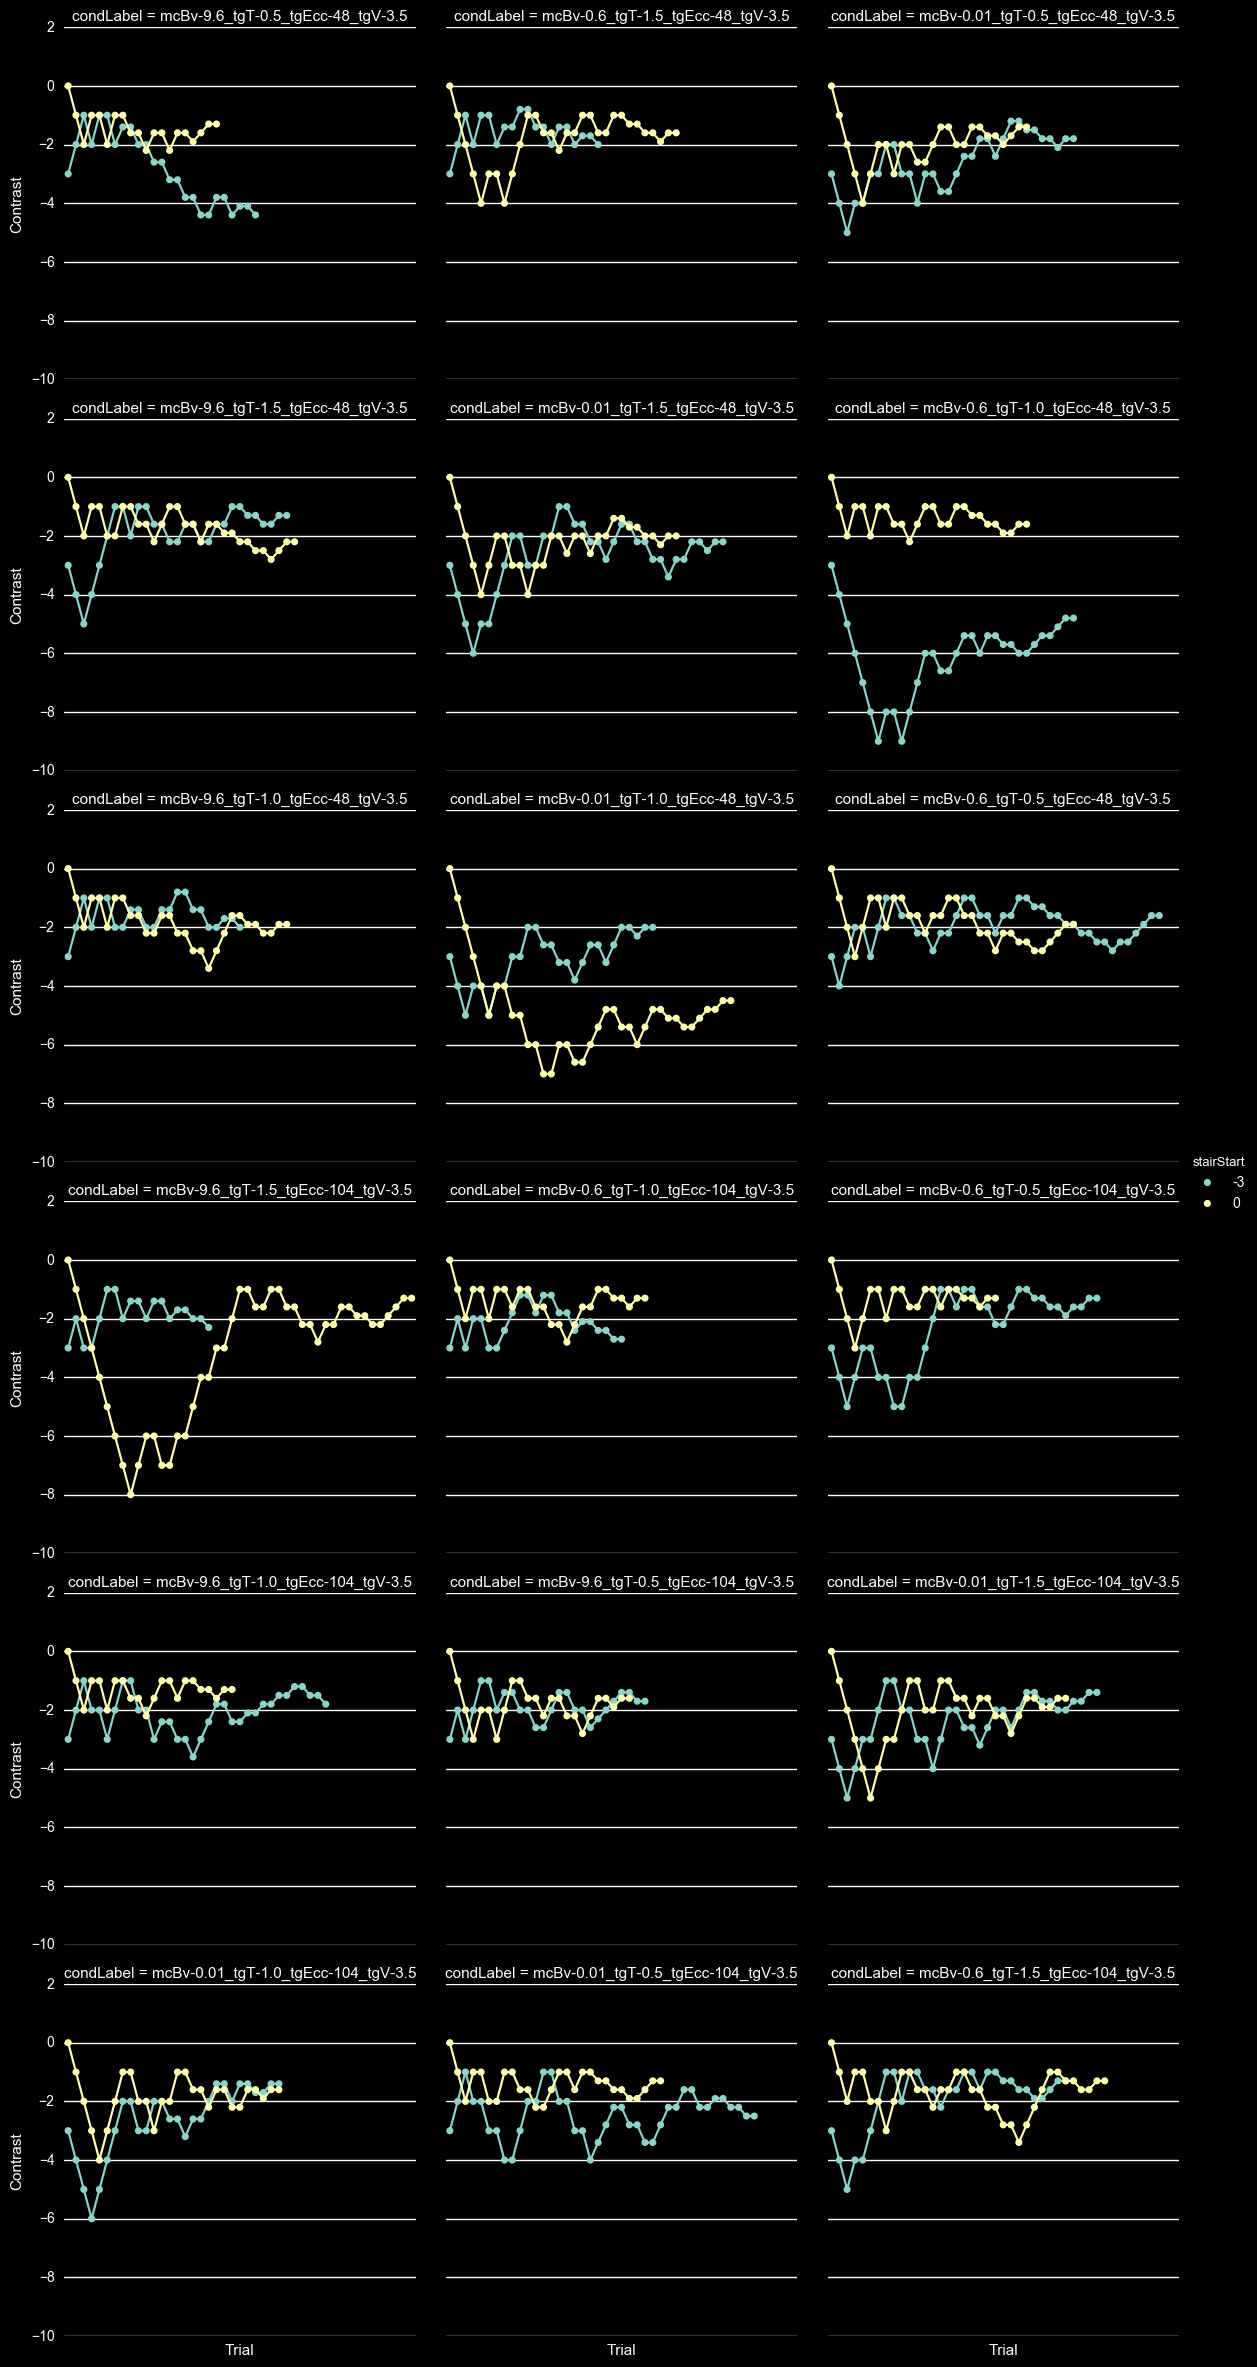

In [12]:
g = sns.factorplot(x='trialN', y='intns', hue='stairStart', col='condLabel', data=trials, 
               col_wrap=3, ci=None, scale=.5)
g.set_axis_labels('Trial','Contrast')
g.set(xticks=[])
#plt.ylim(-0.1,1.1)

In [13]:
print np.shape(revMeans)
meanRevsDF = pd.DataFrame({
    'meanRevs4': np.array(revMeans)[:,0],
    'meanRevs6': np.array(revMeans)[:,1],
    'meanRevs8': np.array(revMeans)[:,2] })
orderedRevMeans = pd.concat([meanRevsDF, orderInfo], axis=1)
#orderedRevMeans.head(5)
stairsWithRevs = pd.merge(orderedRevMeans, stairs, on=['participant','mcBv','targTpeak',
                                                       'targXoff2', 'targV', 'stairStart'])
stairsWithRevs.head(5)

(36, 3)


,meanRevs4,meanRevs6,meanRevs8,mcBv,participant,stairStart,targTpeak,targV,targXoff2,expName,...,targOri1,targOri2,targXoff1,targYoff,targTtot,trialT,fixCross,stairLabel,meanRev6,condLabel
0,-1.750,-1.80,-1.7250,9.60,0,0,0.5,3.5,48,mc2_tgT-mcBv,...,0,0,-48,0,1,2,1,st0_mcBv9.6_targTpeak0.5,-1.80,mcBv-9.6_tgT-0.5_tgEcc-48_tgV-3.5
1,-1.775,-1.65,-1.6125,0.60,0,-3,1.5,3.5,48,mc2_tgT-mcBv,...,0,0,-48,0,1,2,1,st-3_mcBv0.6_targTpeak1.5,-1.65,mcBv-0.6_tgT-1.5_tgEcc-48_tgV-3.5
2,-1.700,-1.80,-1.9750,0.01,0,0,0.5,3.5,48,mc2_tgT-mcBv,...,0,0,-48,0,1,2,1,st0_mcBv0.01_targTpeak0.5,-1.80,mcBv-0.01_tgT-0.5_tgEcc-48_tgV-3.5
3,-1.525,-1.65,-1.6125,9.60,0,-3,1.5,3.5,48,mc2_tgT-mcBv,...,0,0,-48,0,1,2,1,st-3_mcBv9.6_targTpeak1.5,-1.65,mcBv-9.6_tgT-1.5_tgEcc-48_tgV-3.5
4,-4.175,-3.75,-3.1875,9.60,0,-3,0.5,3.5,48,mc2_tgT-mcBv,...,0,0,-48,0,1,2,1,st-3_mcBv9.6_targTpeak0.5,-3.75,mcBv-9.6_tgT-0.5_tgEcc-48_tgV-3.5


In [14]:
condRevMeans = stairsWithRevs.groupby('condLabel')['meanRevs4','meanRevs6','meanRevs8'].mean()
condRevMeans['condLabel'] = condRevMeans.index
condRevMeans = condRevMeans.reset_index(drop=True)
condRevMeans.head(6)

,meanRevs4,meanRevs6,meanRevs8,condLabel
0,-1.7500,-1.900,-1.92500,mcBv-0.01_tgT-0.5_tgEcc-104_tgV-3.5
1,-1.7875,-1.975,-2.23125,mcBv-0.01_tgT-0.5_tgEcc-48_tgV-3.5
2,-1.7250,-1.850,-1.95000,mcBv-0.01_tgT-1.0_tgEcc-104_tgV-3.5
3,-3.7750,-4.000,-4.25000,mcBv-0.01_tgT-1.0_tgEcc-48_tgV-3.5
4,-1.9125,-2.025,-2.08125,mcBv-0.01_tgT-1.5_tgEcc-104_tgV-3.5
5,-2.3250,-2.300,-2.35000,mcBv-0.01_tgT-1.5_tgEcc-48_tgV-3.5


In [15]:
stairsClean = stairs.drop(['stairStart','meanRev6','stairLabel'],axis=1,inplace=False)
stairsClean.drop_duplicates(inplace=True)
conds = pd.merge(condRevMeans, stairsClean, how='inner', on='condLabel')
print conds.columns
conds.head(7)

Index([u'meanRevs4', u'meanRevs6', u'meanRevs8', u'condLabel', u'expName',
       u'expPara', u'time', u'participant', u'dom', u'session', u'nRevs',
       u'mcSz', u'mcSf', u'mcBv', u'mcBsf', u'mcPeriGap', u'mcPeriFade',
       u'targSz', u'targSf', u'targOri1', u'targOri2', u'targXoff1',
       u'targXoff2', u'targYoff', u'targV', u'targTtot', u'targTpeak',
       u'trialT', u'fixCross'],
      dtype='object')


,meanRevs4,meanRevs6,meanRevs8,condLabel,expName,expPara,time,participant,dom,session,...,targOri1,targOri2,targXoff1,targXoff2,targYoff,targV,targTtot,targTpeak,trialT,fixCross
0,-1.7500,-1.900,-1.92500,mcBv-0.01_tgT-0.5_tgEcc-104_tgV-3.5,mc2_tgT-mcBv,mtn-p,2017-01-31_1225,0,0,1,...,0,0,-104,104,0,3.5,1,0.5,2,1
1,-1.7875,-1.975,-2.23125,mcBv-0.01_tgT-0.5_tgEcc-48_tgV-3.5,mc2_tgT-mcBv,mtn-c,2017-01-31_1052,0,0,1,...,0,0,-48,48,0,3.5,1,0.5,2,1
2,-1.7250,-1.850,-1.95000,mcBv-0.01_tgT-1.0_tgEcc-104_tgV-3.5,mc2_tgT-mcBv,mtn-p,2017-01-31_1225,0,0,1,...,0,0,-104,104,0,3.5,1,1.0,2,1
3,-3.7750,-4.000,-4.25000,mcBv-0.01_tgT-1.0_tgEcc-48_tgV-3.5,mc2_tgT-mcBv,mtn-c,2017-01-31_1052,0,0,1,...,0,0,-48,48,0,3.5,1,1.0,2,1
4,-1.9125,-2.025,-2.08125,mcBv-0.01_tgT-1.5_tgEcc-104_tgV-3.5,mc2_tgT-mcBv,mtn-p,2017-01-31_1225,0,0,1,...,0,0,-104,104,0,3.5,1,1.5,2,1
5,-2.3250,-2.300,-2.35000,mcBv-0.01_tgT-1.5_tgEcc-48_tgV-3.5,mc2_tgT-mcBv,mtn-c,2017-01-31_1052,0,0,1,...,0,0,-48,48,0,3.5,1,1.5,2,1
6,-1.4875,-1.425,-1.63125,mcBv-0.6_tgT-0.5_tgEcc-104_tgV-3.5,mc2_tgT-mcBv,mtn-p,2017-01-31_1225,0,0,1,...,0,0,-104,104,0,3.5,1,0.5,2,1


In [16]:
print conds.shape
subconds = conds[conds.targXoff2==48]
print subconds.shape

(18, 29)
(9, 29)


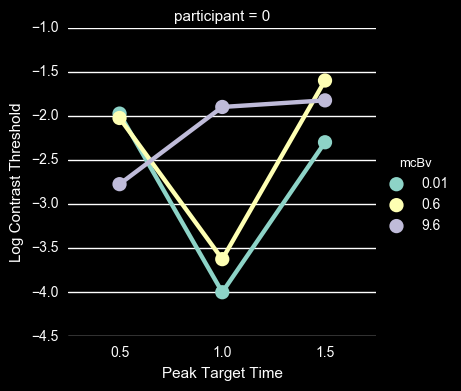

In [17]:
g = sns.factorplot(x='targTpeak', y='meanRevs6', hue='mcBv', col='participant', 
                   data=conds.ix[conds.targXoff2==48], ci=None)
g.set_axis_labels('Peak Target Time','Log Contrast Threshold')
#g.set(xticks=[])
#plt.ylim(-0.1,1.1)

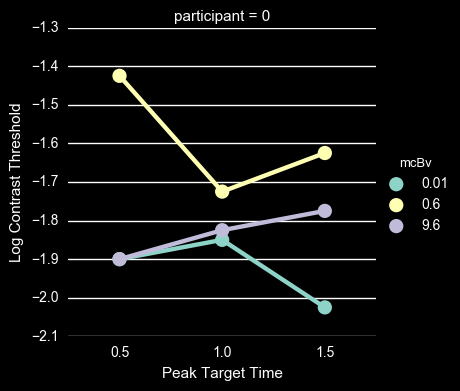

In [18]:
g = sns.factorplot(x='targTpeak', y='meanRevs6', hue='mcBv', col='participant', 
                   data=conds.ix[conds.targXoff2==104], ci=None)
g.set_axis_labels('Peak Target Time','Log Contrast Threshold')
#g.set(xticks=[])
#plt.ylim(-0.1,1.1)